In [17]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, \
                                            classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import loguniform
import re 

# Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Algorithms
from sklearn.linear_model import LogisticRegression

# Dealing with warnings
import warnings
warnings.filterwarnings('ignore')

# Setting DataFrame's to show 100 max columns, instead of compressing then
pd.set_option('display.max_columns', 100)

In [18]:
people = pd.read_csv('../raw_data/people_analytics.csv')

In [72]:
people.shape

(1470, 35)

In [79]:
people_test['EducationField'].value_counts()

Life Sciences       148
Medical             119
Marketing            40
Technical Degree     30
Other                25
Human Resources       6
Name: EducationField, dtype: int64

In [75]:
people_train, people_test = train_test_split(people, random_state = 0)

In [77]:
people_train['EducationField'].value_counts()

Life Sciences       458
Medical             345
Marketing           119
Technical Degree    102
Other                57
Human Resources      21
Name: EducationField, dtype: int64

In [20]:
people_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,Y,No,11,3,1,80,3,10,6,3,9,8,7,5
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,1,1974,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Y,Yes,11,3,3,80,3,1,4,3,1,0,0,0
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,Y,No,14,3,2,80,2,29,3,3,8,7,0,7
1128,36,No,Travel_Frequently,1302,Research & Development,6,4,Life Sciences,1,1594,1,Male,80,4,2,Laboratory Technician,1,Married,5562,19711,3,Y,Yes,13,3,4,80,1,9,3,3,3,2,0,2
1323,28,No,Non-Travel,280,Human Resources,1,2,Life Sciences,1,1858,3,Male,43,3,1,Human Resources,4,Divorced,2706,10494,1,Y,No,15,3,2,80,1,3,2,3,3,2,2,2


In [21]:
people_train['Attrition'].value_counts()

No     923
Yes    179
Name: Attrition, dtype: int64

In [22]:
people_train.shape

(1102, 35)

In [23]:
def camel_case_split(str): 
    return '_'.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

In [24]:
new_columns = []
for str in people_train.columns.tolist():
    new_columns.append(camel_case_split(str).lower())

In [25]:
people_train.columns = new_columns

In [26]:
people_train.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [27]:
people_train.drop(columns = ['employee_count', 'over', 'standard_hours', 'employee_number'], inplace = True)

In [28]:
people_train.shape

(1102, 31)

No     923
Yes    179
Name: attrition, dtype: int64


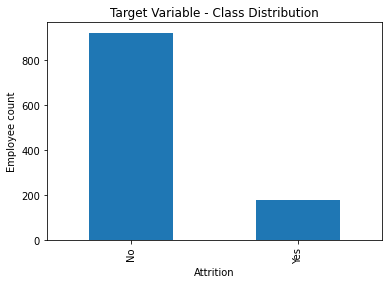

In [29]:
# Counting values from 0 and 1 in the target variable
print(people_train['attrition'].value_counts())

# Plotting the target class proportion
people_train['attrition'].value_counts().plot(kind = 'bar')
plt.title('Target Variable - Class Distribution')
plt.xlabel('Attrition')
plt.ylabel('Employee count');

In [30]:
ordinal_cols = [
    'education',
    'environment_satisfaction',
    'job_involvement',
    'job_level',
    'job_satisfaction',
    'performance_rating',
    'relantionship_satisfaction',
    'stock_option_level',
    'work_life_balance'
]

numeric_cols = [
    'age',
    'daily_rate',
    'distance_from_home',
    'hourly_rate',
    'monthly_income',
    'monthly_rate',
    'num_companies_worked',
    'percent_salary_hike',
    'total_working_years',
    'training_times_last_year',
    'years_at_company',
    'years_in_current_role',
    'years_since_last_promotion',
    'years_with_curr_manager'
]

numeric_ordinal_cols = [
    'age',
    'daily_rate',
    'distance_from_home',
    'hourly_rate',
    'monthly_income',
    'monthly_rate',
    'num_companies_worked',
    'percent_salary_hike',
    'total_working_years',
    'training_times_last_year',
    'years_at_company',
    'years_in_current_role',
    'years_since_last_promotion',
    'years_with_curr_manager',
    'education',
    'environment_satisfaction',
    'job_involvement',
    'job_level',
    'job_satisfaction',
    'performance_rating',
    'relationship_satisfaction',
    'stock_option_level',
    'work_life_balance'
]

categorical_cols = [
    'business_travel',
    'department',
    'education_field',
    'gender',
    'job_role',
    'marital_status',
    'over_time'
]

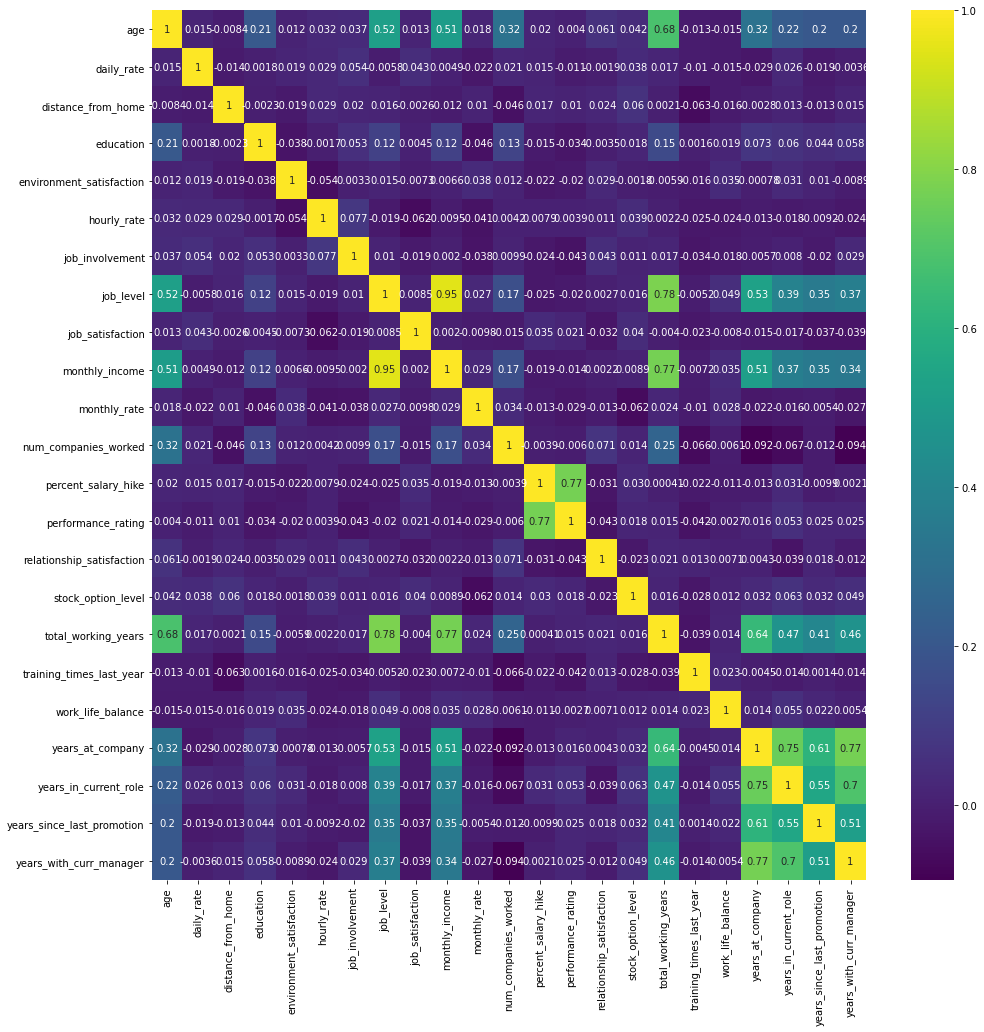

In [31]:
corr = people_train.corr()

plt.figure(figsize = (16, 16))
sns.heatmap(corr, annot = True, cmap = 'viridis');

In [32]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return print(pd.DataFrame(au_corr[0:n], columns = ['ABS CORR']))

In [33]:
get_top_abs_correlations(people_train[numeric_ordinal_cols], n = 5)

                                             ABS CORR
monthly_income      job_level                0.949169
total_working_years job_level                0.784325
percent_salary_hike performance_rating       0.772279
monthly_income      total_working_years      0.769750
years_at_company    years_with_curr_manager  0.769263


## Feature Engineering

In [34]:
# Creating supporting table: Monthly Income grouped by Department and Job Level
_minc_gb = people_train.groupby(['department', 'job_level'])['monthly_income'].median()

print(_minc_gb['Human Resources', 1], '\n')
print(_minc_gb)

2467.0 

department              job_level
Human Resources         1             2467.0
                        2             5985.0
                        3             9756.0
                        4            16799.0
                        5            19189.0
Research & Development  1             2690.5
                        2             5109.5
                        3            10388.0
                        4            16422.0
                        5            19237.0
Sales                   1             2408.5
                        2             5396.0
                        3             9151.0
                        4            15972.0
                        5            19586.0
Name: monthly_income, dtype: float64


In [35]:
# Creating departments list and job levels list for later iteration
departments = people_train['department'].unique().tolist()
print(departments)

job_levels = sorted(people_train['job_level'].unique().tolist())
print(job_levels)

# Creating 'below_median_dpt_joblevel_monthly_income' column and populating with boolean 
# values (1, for True, 0 for False)
for department in departments:
    for job_level in job_levels:
        people_train.loc[((people_train['department'] == department) & \
                          (people_train['job_level'] == job_level) & \
                          (people_train['monthly_income'] < _minc_gb[department, job_level])), \
                             'below_median_dpt_joblevel_monthly_income'] = int(1)
        
        people_train.loc[((people_train['department'] == department) & \
                          (people_train['job_level'] == job_level) & \
                          (people_train['monthly_income'] >= _minc_gb[department, job_level])), \
                             'below_median_dpt_joblevel_monthly_income'] = int(0)

# Transforming float bools to int
people_train['below_median_dpt_joblevel_monthly_income'] = \
                    people_train['below_median_dpt_joblevel_monthly_income'].apply(int)

['Research & Development', 'Human Resources', 'Sales']
[1, 2, 3, 4, 5]


In [36]:
people_train.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,No,11,3,1,3,10,6,3,9,8,7,5,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Yes,11,3,3,3,1,4,3,1,0,0,0,1
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,No,14,3,2,2,29,3,3,8,7,0,7,0


In [37]:
# Creating new temporary variable for mapping future variable Job Role Different from Edu Field
people_train['edu_field_job_role'] = people_train['education_field'] + '_' + people_train['job_role']

# Creating dict for mapping new variable Job Role Different from Edu Field
edu_field_job_role_map = { 
     'Human Resources_Human Resources': 0,
     'Human Resources_Manager': 0,
     'Life Sciences_Healthcare Representative': 0,
     'Life Sciences_Human Resources': 1,
     'Life Sciences_Laboratory Technician': 0,
     'Life Sciences_Manager': 1,
     'Life Sciences_Manufacturing Director': 0,
     'Life Sciences_Research Director': 0,
     'Life Sciences_Research Scientist': 0,
     'Life Sciences_Sales Executive': 1,
     'Life Sciences_Sales Representative': 1,
     'Marketing_Manager': 0,
     'Marketing_Sales Executive': 0,
     'Marketing_Sales Representative': 0,
     'Medical_Healthcare Representative': 0,
     'Medical_Human Resources': 1,
     'Medical_Laboratory Technician': 0,
     'Medical_Manager': 1,
     'Medical_Manufacturing Director': 0,
     'Medical_Research Director': 0,
     'Medical_Research Scientist': 0,
     'Medical_Sales Executive': 1,
     'Medical_Sales Representative': 1,
     'Other_Healthcare Representative': 0,
     'Other_Human Resources': 0,
     'Other_Laboratory Technician': 0,
     'Other_Manager': 0,
     'Other_Manufacturing Director': 0,
     'Other_Research Director': 0,
     'Other_Research Scientist': 0,
     'Other_Sales Executive': 0,
     'Other_Sales Representative': 0,
     'Technical Degree_Healthcare Representative': 0,
     'Technical Degree_Human Resources': 0,
     'Technical Degree_Laboratory Technician': 0,
     'Technical Degree_Manager': 0,
     'Technical Degree_Manufacturing Director': 0,
     'Technical Degree_Research Director': 0,
     'Technical Degree_Research Scientist': 0,
     'Technical Degree_Sales Executive': 0,
     'Technical Degree_Sales Representative': 0
}

# Mapping variable Job Role Different from Edu Field with bools, as per dict edu_field_job_role_map
people_train['job_role_diff_edu_field'] = people_train['edu_field_job_role'].map(edu_field_job_role_map)

people_train = people_train.drop('edu_field_job_role', axis = 1)

In [38]:
# Distance from home analysis (INCONCLUSIVE!)
# plt.scatter('distance_from_home', 'job_satisfaction', 
#             data = people_train[people_train['attrition'] == 'Yes'], alpha = .1)
# plt.show()

# plt.scatter('distance_from_home', 'job_satisfaction', 
#             data = people_train[people_train['attrition'] == 'No'], alpha = .1)

In [39]:
# sns.distplot(people_train[people_train['attrition'] == 'Yes']['distance_from_home'])
# sns.distplot(people_train[people_train['attrition'] == 'No']['distance_from_home'])

In [40]:
people_train.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,Female,55,1,2,Laboratory Technician,4,Married,6674,16392,0,No,11,3,1,3,10,6,3,9,8,7,5,0,0
1402,31,No,Travel_Rarely,1276,Research & Development,2,1,Medical,4,Female,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,Yes,11,3,3,3,1,4,3,1,0,0,0,1,0
1054,49,No,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,No,14,3,2,2,29,3,3,8,7,0,7,0,0


In [41]:
# Creating Promoted in the Last Two Years variable; bool: 1 True, 0 False
people_train['promoted_last_2_years'] = \
        people_train['years_since_last_promotion'].apply(lambda x: 1 if x <= 2 else 0)

In [42]:
# Checking minimal value for Monthly Income contitioned to 0 Total Working Years
print(people_train[people_train['total_working_years'] == 0]['monthly_income'].describe())

total_workin_years_min = people_train[people_train['total_working_years'] == 0]['monthly_income'].min()

count      10.000000
mean     1524.600000
std       290.596398
min      1051.000000
25%      1279.000000
50%      1590.000000
75%      1698.250000
max      1904.000000
Name: monthly_income, dtype: float64


In [43]:
# Creating Monthly Income per Toatl Years Workerd variable
def get_income_per_years_worked(x):
    if x == 0:
        people_train['m_income_per_total_years_worked'] = total_workin_years_min
    else:
        people_train['m_income_per_total_years_worked'] = \
                people_train['monthly_income'] / people_train['total_working_years']

In [44]:
people_train['total_working_years'].apply(get_income_per_years_worked)

944     None
1402    None
1054    None
1128    None
1323    None
        ... 
763     None
835     None
1216    None
559     None
684     None
Name: total_working_years, Length: 1102, dtype: object

In [45]:
people_train[people_train['m_income_per_total_years_worked'] == np.inf]['m_income_per_total_years_worked'] = 1
people_train['m_income_per_total_years_worked'].replace(np.inf, total_workin_years_min, inplace = True)

In [46]:
people_train['m_income_per_total_years_worked'].describe()

count    1102.000000
mean      721.873584
std       487.206460
min       100.050000
25%       424.507576
50%       603.896078
75%       850.404762
max      2994.000000
Name: m_income_per_total_years_worked, dtype: float64

In [47]:
# # Replacing np.inf with minimun value of monthly_income variable
# people_train[people_train['m_income_per_total_years_worked'] == np.inf] = 100

In [48]:
# people_train['m_income_per_total_years_worked'].describe()

In [49]:
# Monthly Income per Age
people_train['m_income_per_age'] = people_train['monthly_income'] / people_train['age']

In [50]:
salary_hike_median = people_train['percent_salary_hike'].median()

people_train['below_median_pct_salary_hike'] = \
        people_train['percent_salary_hike'].apply(lambda x: 1 if x < salary_hike_median else 0)

In [51]:
people_train['attrition'] = people_train['attrition'].map({
                                                'No': 0,
                                                'Yes': 1
                                            })

people_train['gender_male'] = people_train['gender'].map({
                                                'Female': 0,
                                                'Male': 1
                                            })

people_train['over_time'] = people_train['over_time'].map({
                                                'No': 0,
                                                'Yes': 1
                                            })

people_train = people_train.drop('gender', axis = 1)

In [52]:
people_train.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
944,28,0,Non-Travel,1476,Research & Development,1,3,Life Sciences,3,55,1,2,Laboratory Technician,4,Married,6674,16392,0,0,11,3,1,3,10,6,3,9,8,7,5,0,0,0,667.400000,238.357143,1,0
1402,31,0,Travel_Rarely,1276,Research & Development,2,1,Medical,4,59,1,1,Laboratory Technician,4,Divorced,1129,17536,1,1,11,3,3,3,1,4,3,1,0,0,0,1,0,1,1129.000000,36.419355,1,0
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,3,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,0,14,3,2,2,29,3,3,8,7,0,7,0,0,1,360.896552,213.591837,0,1
1128,36,0,Travel_Frequently,1302,Research & Development,6,4,Life Sciences,1,80,4,2,Laboratory Technician,1,Married,5562,19711,3,1,13,3,4,1,9,3,3,3,2,0,2,0,0,1,618.000000,154.500000,1,1
1323,28,0,Non-Travel,280,Human Resources,1,2,Life Sciences,3,43,3,1,Human Resources,4,Divorced,2706,10494,1,0,15,3,2,1,3,2,3,3,2,2,2,0,1,1,902.000000,96.642857,0,1


In [53]:
business_travel_map = {
    'Non-Travel': 0, 
    'Travel_Rarely': 1, 
    'Travel_Frequently': 2
}

people_train['business_travel'] = people_train['business_travel'].map(business_travel_map)

<AxesSubplot:>

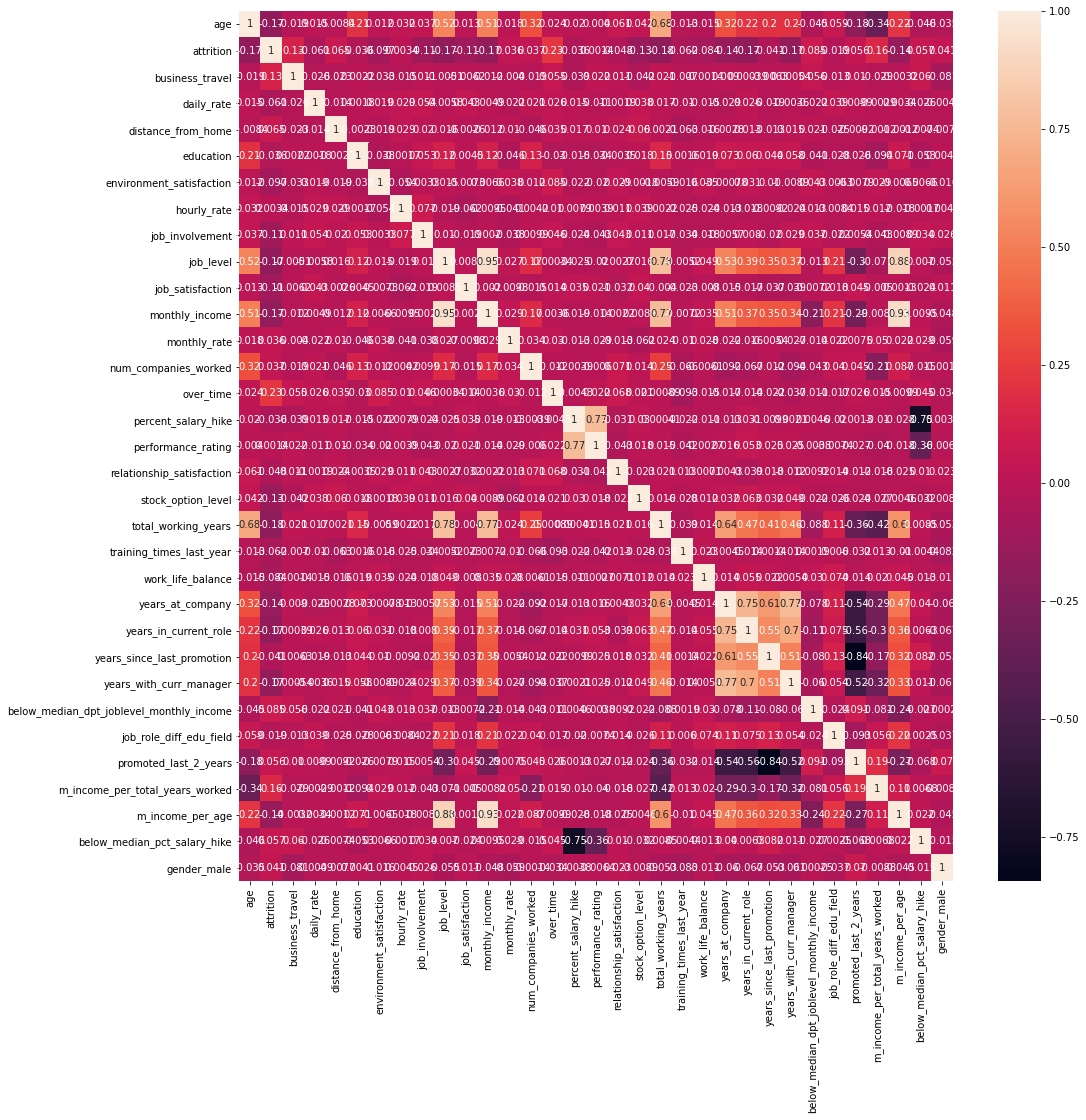

In [54]:
corr2 = people_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr2, annot = True)

<AxesSubplot:>

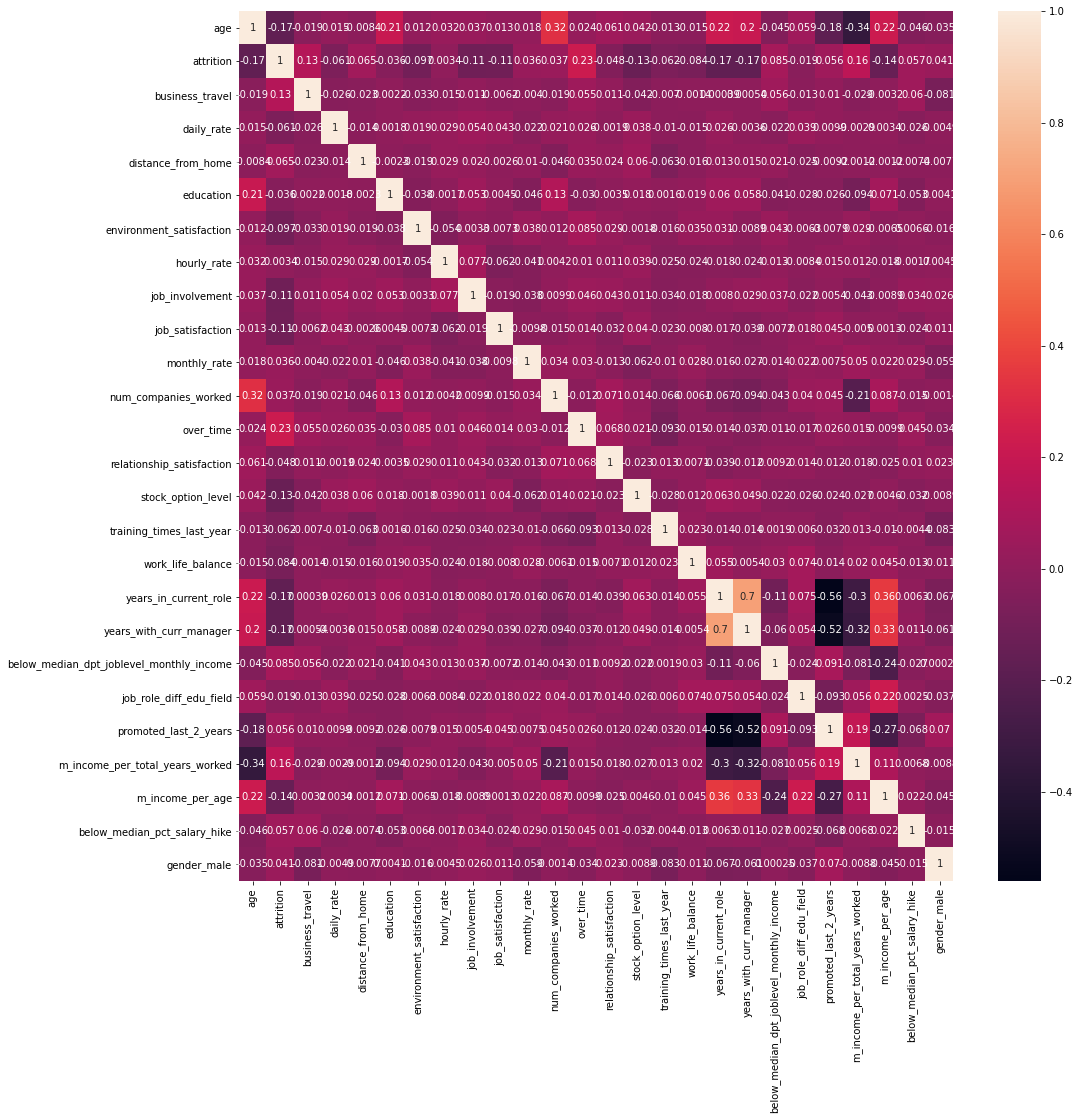

In [55]:
people_train = people_train.drop([
                                   'job_level', 
                                   'monthly_income', 
                                   'years_since_last_promotion', 
                                   'total_working_years', 
                                   'percent_salary_hike',
                                   'years_at_company',
                                   'performance_rating',
#                                    'years_with_curr_manager',
#                                    'years_in_current_role'
                                  ], axis = 1)
corr3 = people_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr3, annot = True)

In [56]:
people_train

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,hourly_rate,job_involvement,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
944,28,0,0,1476,Research & Development,1,3,Life Sciences,3,55,1,Laboratory Technician,4,Married,16392,0,0,1,3,6,3,8,5,0,0,0,667.400000,238.357143,1,0
1402,31,0,1,1276,Research & Development,2,1,Medical,4,59,1,Laboratory Technician,4,Divorced,17536,1,1,3,3,4,3,0,0,1,0,1,1129.000000,36.419355,1,0
1054,49,0,1,1490,Research & Development,7,4,Life Sciences,3,35,3,Healthcare Representative,2,Divorced,20948,3,0,2,2,3,3,7,7,0,0,1,360.896552,213.591837,0,1
1128,36,0,2,1302,Research & Development,6,4,Life Sciences,1,80,4,Laboratory Technician,1,Married,19711,3,1,4,1,3,3,2,2,0,0,1,618.000000,154.500000,1,1
1323,28,0,0,280,Human Resources,1,2,Life Sciences,3,43,3,Human Resources,4,Divorced,10494,1,0,2,1,2,3,2,2,0,1,1,902.000000,96.642857,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,0,1,1333,Sales,10,4,Life Sciences,3,87,3,Sales Representative,3,Married,18410,1,1,4,1,2,3,1,0,1,1,1,2220.000000,65.294118,0,0
835,35,0,1,528,Human Resources,8,4,Technical Degree,3,100,3,Human Resources,3,Single,7108,1,0,2,0,2,1,4,4,0,0,1,720.500000,123.514286,0,1
1216,43,0,1,1179,Sales,2,3,Medical,4,73,3,Sales Executive,4,Married,6069,1,1,1,1,3,3,9,8,0,1,0,784.700000,182.488372,0,1
559,38,0,1,268,Research & Development,2,5,Medical,4,92,3,Research Scientist,3,Married,20471,6,1,2,1,0,1,0,1,0,0,1,509.500000,80.447368,1,1


In [57]:
# Checking VIF

to_drop = [
#     'business_travel',
    'department', # not numeric
    'education_field', # not numeric
    'job_role', 
    'marital_status',
    'age',
    'job_involvement',
#     'hourly_rate',
    'work_life_balance',
]

df = pd.DataFrame()
df['vif_index'] = [vif(people_train.drop(to_drop, axis = 1).values, 
                       i) for i in range(people_train.drop(to_drop, axis = 1).shape[1])]

df.index = people_train.drop(to_drop, axis = 1).columns

df

,vif_index
attrition,1.466115
business_travel,5.025259
daily_rate,4.782703
distance_from_home,2.283558
education,8.874413
environment_satisfaction,6.954478
hourly_rate,9.780872
job_satisfaction,6.724875
monthly_rate,4.828843
num_companies_worked,2.509284


In [58]:
people_train = people_train.drop(to_drop, axis = 1)

In [59]:
people_train = pd.get_dummies(people_train)

<AxesSubplot:>

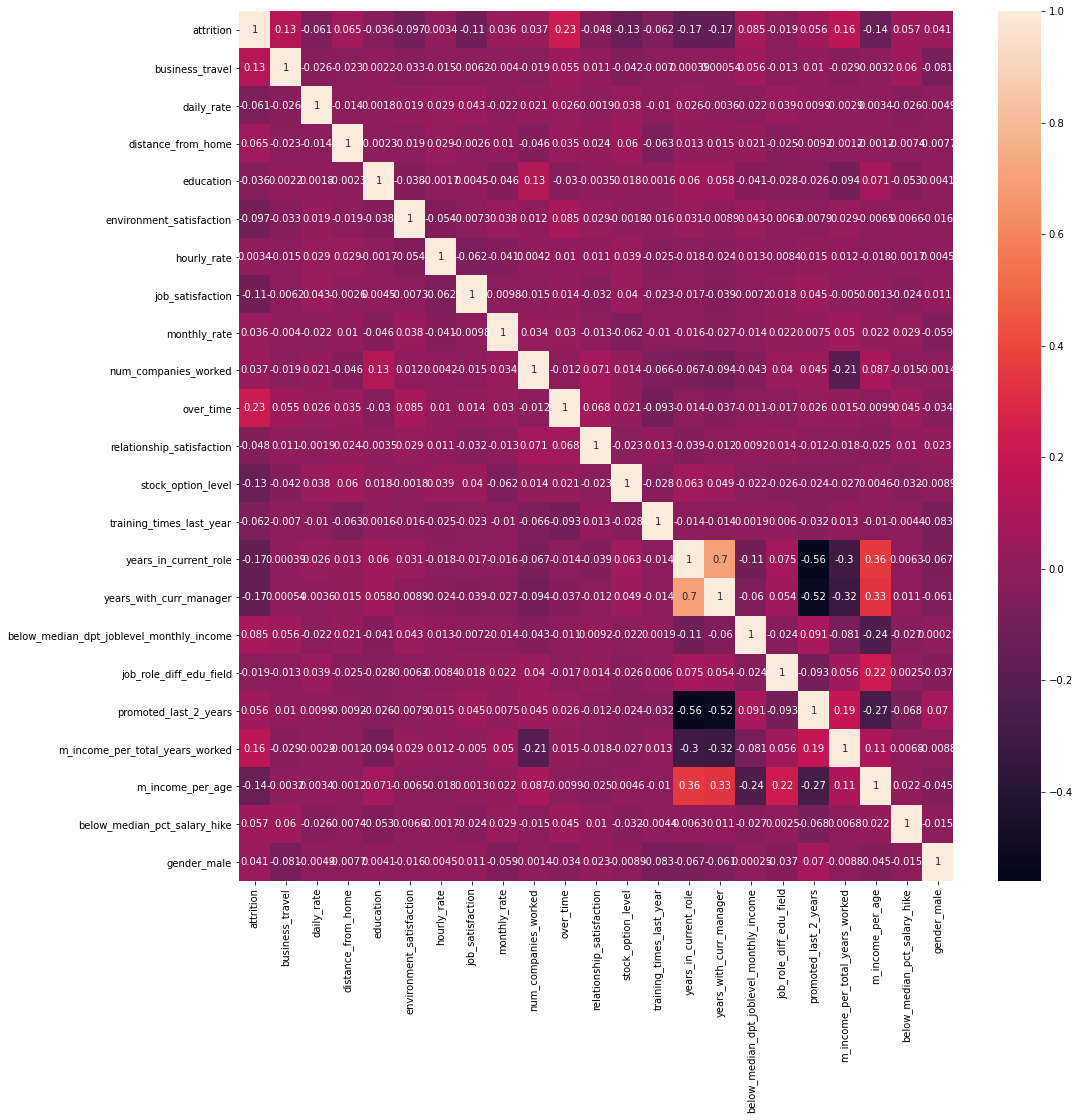

In [60]:
corr4 = people_train.corr()
plt.figure(figsize = (16, 16))
sns.heatmap(corr4, annot = True)

In [61]:
people_train

,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
944,0,0,1476,1,3,3,55,4,16392,0,0,1,3,6,8,5,0,0,0,667.400000,238.357143,1,0
1402,0,1,1276,2,1,4,59,4,17536,1,1,3,3,4,0,0,1,0,1,1129.000000,36.419355,1,0
1054,0,1,1490,7,4,3,35,2,20948,3,0,2,2,3,7,7,0,0,1,360.896552,213.591837,0,1
1128,0,2,1302,6,4,1,80,1,19711,3,1,4,1,3,2,2,0,0,1,618.000000,154.500000,1,1
1323,0,0,280,1,2,3,43,4,10494,1,0,2,1,2,2,2,0,1,1,902.000000,96.642857,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,1,1333,10,4,3,87,3,18410,1,1,4,1,2,1,0,1,1,1,2220.000000,65.294118,0,0
835,0,1,528,8,4,3,100,3,7108,1,0,2,0,2,4,4,0,0,1,720.500000,123.514286,0,1
1216,0,1,1179,2,3,4,73,4,6069,1,1,1,1,3,9,8,0,1,0,784.700000,182.488372,0,1
559,0,1,268,2,5,4,92,3,20471,6,1,2,1,0,0,1,0,0,1,509.500000,80.447368,1,1


In [62]:
# people_train = people_train.drop(['department_Sales', 'department_Human Resources', ], axis = 1)

In [63]:
get_top_abs_correlations(people_train, n = 20)

                                                                          ABS CORR
years_in_current_role                    years_with_curr_manager          0.695595
                                         promoted_last_2_years            0.559831
years_with_curr_manager                  promoted_last_2_years            0.521663
years_in_current_role                    m_income_per_age                 0.357002
years_with_curr_manager                  m_income_per_age                 0.332909
                                         m_income_per_total_years_worked  0.321250
years_in_current_role                    m_income_per_total_years_worked  0.298737
promoted_last_2_years                    m_income_per_age                 0.271152
below_median_dpt_joblevel_monthly_income m_income_per_age                 0.241994
attrition                                over_time                        0.225846
job_role_diff_edu_field                  m_income_per_age                 0.222062
num_

In [92]:
# people_train.to_csv('../raw_data/people_feat_eng.csv', header = True, index = False) 

In [65]:
people_test.to_csv('../raw_data/dd_people_test.csv', header = True, index = False)

In [66]:
people_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 442 to 1395
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       368 non-null    int64 
 1   Attrition                 368 non-null    object
 2   BusinessTravel            368 non-null    object
 3   DailyRate                 368 non-null    int64 
 4   Department                368 non-null    object
 5   DistanceFromHome          368 non-null    int64 
 6   Education                 368 non-null    int64 
 7   EducationField            368 non-null    object
 8   EmployeeCount             368 non-null    int64 
 9   EmployeeNumber            368 non-null    int64 
 10  EnvironmentSatisfaction   368 non-null    int64 
 11  Gender                    368 non-null    object
 12  HourlyRate                368 non-null    int64 
 13  JobInvolvement            368 non-null    int64 
 14  JobLevel               

,attrition,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
944,0,0,1476,1,3,3,55,4,16392,0,0,1,3,6,8,5,0,0,0,667.400000,238.357143,1,0
1402,0,1,1276,2,1,4,59,4,17536,1,1,3,3,4,0,0,1,0,1,1129.000000,36.419355,1,0
1054,0,1,1490,7,4,3,35,2,20948,3,0,2,2,3,7,7,0,0,1,360.896552,213.591837,0,1
1128,0,2,1302,6,4,1,80,1,19711,3,1,4,1,3,2,2,0,0,1,618.000000,154.500000,1,1
1323,0,0,280,1,2,3,43,4,10494,1,0,2,1,2,2,2,0,1,1,902.000000,96.642857,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,1,1333,10,4,3,87,3,18410,1,1,4,1,2,1,0,1,1,1,2220.000000,65.294118,0,0
835,0,1,528,8,4,3,100,3,7108,1,0,2,0,2,4,4,0,0,1,720.500000,123.514286,0,1
1216,0,1,1179,2,3,4,73,4,6069,1,1,1,1,3,9,8,0,1,0,784.700000,182.488372,0,1
559,0,1,268,2,5,4,92,3,20471,6,1,2,1,0,0,1,0,0,1,509.500000,80.447368,1,1


## Dataset Train Test Splitting

In [49]:
X = people_train.drop('attrition', axis = 1)
y = people_train['attrition']

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .3, random_state = 0)

### Standard Scaling Robust Scaling

In [51]:
pd.DataFrame(X_train)

,business_travel,daily_rate,distance_from_home,education,environment_satisfaction,hourly_rate,job_satisfaction,monthly_rate,num_companies_worked,over_time,relationship_satisfaction,stock_option_level,training_times_last_year,years_in_current_role,years_with_curr_manager,below_median_dpt_joblevel_monthly_income,job_role_diff_edu_field,promoted_last_2_years,m_income_per_total_years_worked,m_income_per_age,below_median_pct_salary_hike,gender_male
931,0,879,9,2,3,72,3,12858,7,1,3,0,3,4,7,1,0,1,469.500000,156.500000,0,0
880,2,116,13,3,3,77,2,7331,1,0,3,1,2,2,2,0,0,1,1371.500000,85.718750,0,0
790,1,654,5,3,4,34,4,21214,4,0,3,1,2,2,2,1,0,1,791.000000,215.727273,0,1
313,2,553,5,4,4,74,2,23364,6,0,2,2,2,6,8,0,1,0,989.833333,359.939394,1,0
3,2,1392,3,4,4,56,3,23159,1,1,3,0,3,7,0,0,0,0,363.625000,88.151515,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,632,21,4,3,71,4,8423,0,1,4,0,2,7,0,0,0,1,494.636364,106.686275,0,1
1194,1,1225,2,4,2,47,2,21086,6,0,3,3,2,2,2,0,1,1,550.758621,339.829787,0,0
710,0,722,17,3,4,38,3,20489,1,0,4,0,2,8,0,0,1,0,1744.400000,528.606061,1,1
507,1,1176,3,2,2,62,3,3487,1,0,1,1,5,0,2,0,1,1,926.833333,191.758621,0,0


In [52]:
X_train.columns

Index(['business_travel', 'daily_rate', 'distance_from_home', 'education',
       'environment_satisfaction', 'hourly_rate', 'job_satisfaction',
       'monthly_rate', 'num_companies_worked', 'over_time',
       'relationship_satisfaction', 'stock_option_level',
       'training_times_last_year', 'years_in_current_role',
       'years_with_curr_manager', 'below_median_dpt_joblevel_monthly_income',
       'job_role_diff_edu_field', 'promoted_last_2_years',
       'm_income_per_total_years_worked', 'm_income_per_age',
       'below_median_pct_salary_hike', 'gender_male'],
      dtype='object')

In [53]:
rb_scaler = RobustScaler()
X_train = rb_scaler.fit_transform(X_train)
X_val = rb_scaler.transform(X_val)

In [54]:
X_train

array([[-1.        ,  0.11448763,  0.16666667, ...,  0.12597473,
         0.        , -1.        ],
       [ 1.        , -0.9639576 ,  0.5       , ..., -0.39978783,
         0.        , -1.        ],
       [ 0.        , -0.20353357, -0.16666667, ...,  0.56591444,
         0.        ,  0.        ],
       ...,
       [-1.        , -0.10742049,  0.83333333, ...,  2.8899756 ,
         1.        ,  0.        ],
       [ 0.        ,  0.53427562, -0.33333333, ...,  0.38787549,
         0.        , -1.        ],
       [ 0.        , -0.56678445, -0.41666667, ...,  0.47958625,
         0.        , -1.        ]])

### SMOTE Technique

In [55]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

## Logistic Regression

In [56]:
lgmodel = LogisticRegression(random_state=0, l1_ratio = .01)
lgmodel.fit(X_train_smote, y_train_smote)
sacc = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='accuracy')
sf1 = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='f1')
sre = cross_val_score(lgmodel, X_train_smote, y_train_smote, scoring='recall')
print('accuracy: ',sacc.mean())
print('f1:       ',sf1.mean())
print('recall:   ',sre.mean())

y_predlog = lgmodel.predict(X_val)
y_predlog

accuracy:  0.7660569852941176
f1:        0.7711076871531946
recall:    0.7887057086614173


array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

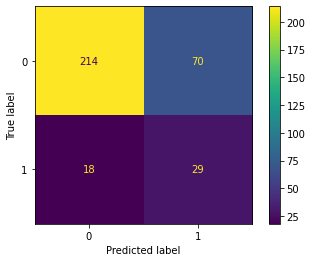

In [57]:
plot_confusion_matrix(lgmodel, X_val, y_val)

In [58]:
for threshold in np.arange(0, 1, .01):
    predicted_proba = lgmodel.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, predicted)
    precision = precision_score(y_val, predicted)
    print(threshold,'==================================================\n', classification_report(y_val, predicted))

0.0 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.01 ==================================================
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       284
           1       0.14      1.00      0.25        47

    accuracy                           0.15       331
   macro avg       0.57      0.51      0.14       331
weighted avg       0.88      0.15      0.06       331

0.02 ==================================================
               precision    recall  f1-score   support

           0       1.00      0.02      0.03       284
           1       0.14      1.00      0.25        47

    accuracy

0.33 ==================================================
               precision    recall  f1-score   support

           0       0.94      0.60      0.73       284
           1       0.24      0.79      0.37        47

    accuracy                           0.62       331
   macro avg       0.59      0.69      0.55       331
weighted avg       0.84      0.62      0.68       331

0.34 ==================================================
               precision    recall  f1-score   support

           0       0.94      0.60      0.73       284
           1       0.24      0.77      0.37        47

    accuracy                           0.63       331
   macro avg       0.59      0.68      0.55       331
weighted avg       0.84      0.63      0.68       331

0.35000000000000003 ==================================================
               precision    recall  f1-score   support

           0       0.94      0.61      0.74       284
           1       0.24      0.77      0.37        

0.67 ==================================================
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       284
           1       0.37      0.47      0.41        47

    accuracy                           0.81       331
   macro avg       0.64      0.67      0.65       331
weighted avg       0.83      0.81      0.82       331

0.68 ==================================================
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       284
           1       0.38      0.47      0.42        47

    accuracy                           0.82       331
   macro avg       0.64      0.67      0.65       331
weighted avg       0.83      0.82      0.82       331

0.6900000000000001 ==================================================
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       284
           1       0.41      0.47      0.44        4

## XGBoost Classifier

In [59]:
from xgboost import XGBClassifier, XGBRFClassifier

In [60]:
xgb_model = XGBClassifier(learning_rate = .001)
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
y_pred_xgb = xgb_model.predict(X_val)

In [62]:
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       284
           1       0.35      0.32      0.33        47

    accuracy                           0.82       331
   macro avg       0.62      0.61      0.61       331
weighted avg       0.81      0.82      0.82       331



In [63]:
for threshold in np.arange(0,1,0.01):
    predicted_proba = xgb_model.predict_proba(X_val)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    accuracy = accuracy_score(y_val, predicted)
    precision = precision_score(y_val, predicted)
    print(threshold,'==================================================\n', classification_report(y_val, predicted))

0.0 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.01 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.02 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy

0.22 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.23 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accuracy                           0.14       331
   macro avg       0.07      0.50      0.12       331
weighted avg       0.02      0.14      0.04       331

0.24 ==================================================
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       284
           1       0.14      1.00      0.25        47

    accurac

0.68 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331

0.6900000000000001 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331

0.7000000000000001 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00     

0.98 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331

0.99 ==================================================
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       284
           1       0.00      0.00      0.00        47

    accuracy                           0.86       331
   macro avg       0.43      0.50      0.46       331
weighted avg       0.74      0.86      0.79       331



## XGBoostRF Classifier

In [64]:
xgbrf_model = XGBRFClassifier(learning_rate = .01)

In [65]:
xgbrf_model.fit(X_train_smote, y_train_smote)


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.01,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_pred_xgbrf = xgbrf_model.predict(X_val)

In [67]:
print(classification_report(y_val, y_pred_xgbrf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       284
           1       0.42      0.30      0.35        47

    accuracy                           0.84       331
   macro avg       0.66      0.62      0.63       331
weighted avg       0.82      0.84      0.83       331



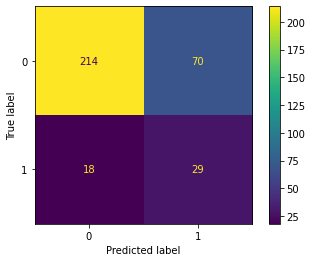

In [68]:
plot_confusion_matrix(lgmodel, X_val, y_val);

## PCA 

In [69]:
# pca = PCA(n_components=2)
# pca.fit(X_train_smote)

In [70]:
# X_pca = pca.transform(X_train_smote)

In [71]:
# pd.DataFrame(X_pca)

In [72]:
# df_Xp = pd.DataFrame(X_pca)
# df_Xp.std()**2 / ((df_Xp.std()**2).sum())

In [73]:
# pca2 = PCA(n_components = 2).fit(X_train_smote)

# pd.DataFrame(pca2.components_)

In [74]:
# Xp2 = pca2.fit(X_train_smote)
# pd.DataFrame(Xp2)

In [75]:
# Xp2_val = pca2.transform(X_val)

In [76]:
# cross_val_score(lgmodel, Xp2_val, y_val, cv=10, scoring = 'recall').mean()

In [77]:
# Xp2_train_smote = Xp2.transform(X_train_smote)

In [78]:
# xgb_model2 = XGBClassifier()
# xgb_model2.fit(Xp2_train_smote, y_train_smote)

In [79]:
# X_val_pca = Xp2.transform(X_val)

In [80]:
# y_pred_xgb_pca = xgb_model2.predict(X_val_pca)

In [81]:
# print(classification_report(y_val, y_pred_xgb_pca))

In [82]:
# X_val

## RandomForestClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [84]:
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [85]:
y_pred_rf = rf_model.predict(X_val)

In [86]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       284
           1       0.72      0.28      0.40        47

    accuracy                           0.88       331
   macro avg       0.81      0.63      0.67       331
weighted avg       0.87      0.88      0.86       331



## AdaBoost (Not finished)

In [87]:
# ada_model = AdaBoostClassifier(base_estimator = rf_model)

In [88]:
# ada_model.fit(X_train_smote, y_train_smote)

In [89]:
# y_pred_ada = ada_model.predict(X_val)

In [90]:
# print(classification_report(y_val, y_pred_ada))

In [91]:
lg

NameError: name 'lg' is not defined